In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

In [17]:

def load_and_preprocess_image(image_path):
    # Carica l'immagine
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Converti in scala di grigi
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Binarizzazione per identificare i bordi
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    
    return image, thresh, gray

def detect_grid(thresh):
    # Trova i contorni
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Trova il rettangolo di bounding
    x, y, w, h = cv2.boundingRect(contours[0])
    
    return x, y, w, h

def estimate_grid_size(gray, x, y, w, h):
    # Prendi una riga di pixel sotto il bordo superiore della griglia
    for dy in range(h):
        scan_line = gray[y+dy, x:x + w]
        if np.any(scan_line > 0):  # Se troviamo almeno un pixel non nero
            break  # Usiamo questa riga per stimare la griglia

    # Conta le transizioni da bianco a nero (bordi delle celle)
    edges = np.where(scan_line[:-1] != scan_line[1:])[0]
    grid_size = len(edges)/2  # Rimuove i bordi esterni
    
    return int(max(grid_size, 1)), int(max(grid_size, 1))  # La griglia è sempre quadrata

def extract_cell_size(w, h, grid_size):
    cell_w = w // grid_size[0]
    cell_h = h // grid_size[1]
    print(cell_w, cell_h)
    print(w,h)
    return cell_w, cell_h

def extract_colors(image, x, y, w, h, cell_w, cell_h, grid_size):
    color_matrix = []
    for row in range(grid_size[1]):
        color_row = []
        for col in range(grid_size[0]):
            cx, cy = x + col * cell_w + cell_w // 2, y + row * cell_h + cell_h // 2
            color = image[cy, cx]
            color_row.append(tuple(color))
        color_matrix.append(color_row)
    return np.array(color_matrix)

def plot_color_matrix(color_matrix):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks(np.arange(color_matrix.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(color_matrix.shape[0] + 1) - 0.5, minor=True)
    
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.tick_params(which="minor", size=0)
    
    ax.imshow(color_matrix.astype(np.uint8))
    plt.show()



In [18]:

def main(image_path):
    image, thresh, gray = load_and_preprocess_image(image_path)
    x, y, w, h = detect_grid(thresh)
    grid_size = estimate_grid_size(gray, x, y, w, h)
    cell_w, cell_h = extract_cell_size(w, h, grid_size)
    color_matrix = extract_colors(image, x, y, w, h, cell_w, cell_h, grid_size)
    
    return color_matrix

def test(directory):
    
    for filename in sorted(os.listdir(directory)):  # Sort files to process sequentially
        if filename == 'queen_solver.ipynb': continue
        image_path = f'{directory}{filename}'
        print(f'Processing {image_path}...')
        image, thresh, gray = load_and_preprocess_image(image_path)
        x, y, w, h = detect_grid(thresh)
        grid_size = estimate_grid_size(gray, x, y, w, h)
        print(f'grid_size = {grid_size}')
        cell_w, cell_h = extract_cell_size(w, h, grid_size)
        color_matrix = extract_colors(image, x, y, w, h, cell_w, cell_h, grid_size)
        print(f'Original image:')
        plt.imshow(image)
        plt.show()
        print(f'Color matrix:')
        plot_color_matrix(color_matrix)
        plt.show()
        print('----------------------------------------')

Processing /Users/HP/Desktop/Python/queen_solver/151.png...
grid_size = (8, 8)
62 62
500 500
Original image:


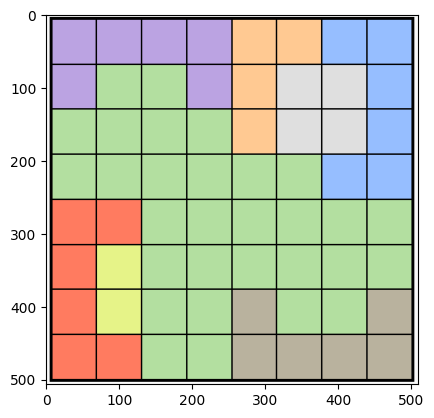

Color matrix:


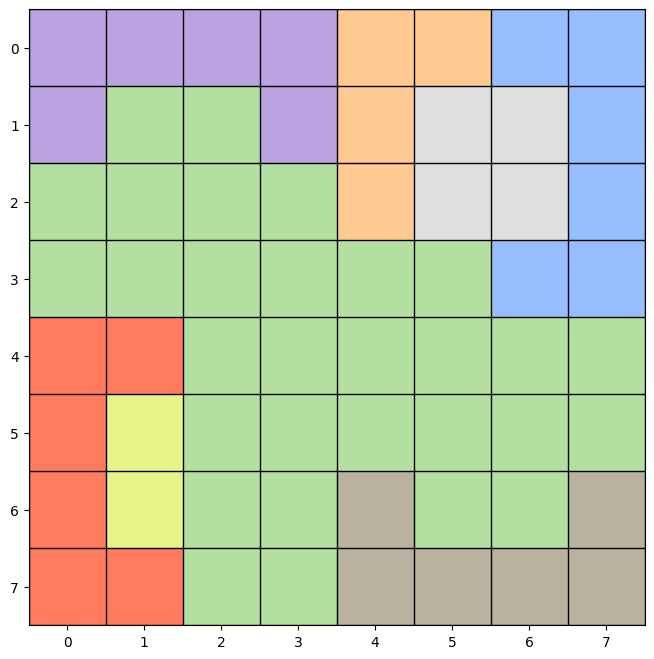

----------------------------------------
Processing /Users/HP/Desktop/Python/queen_solver/170.png...
grid_size = (8, 8)
62 62
500 500
Original image:


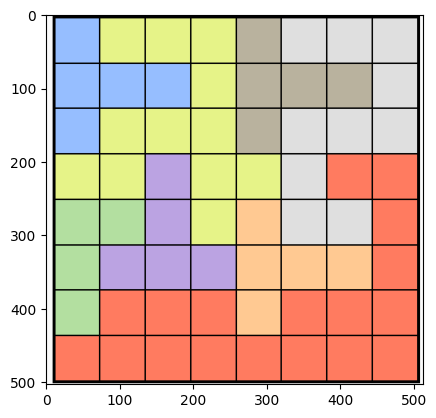

Color matrix:


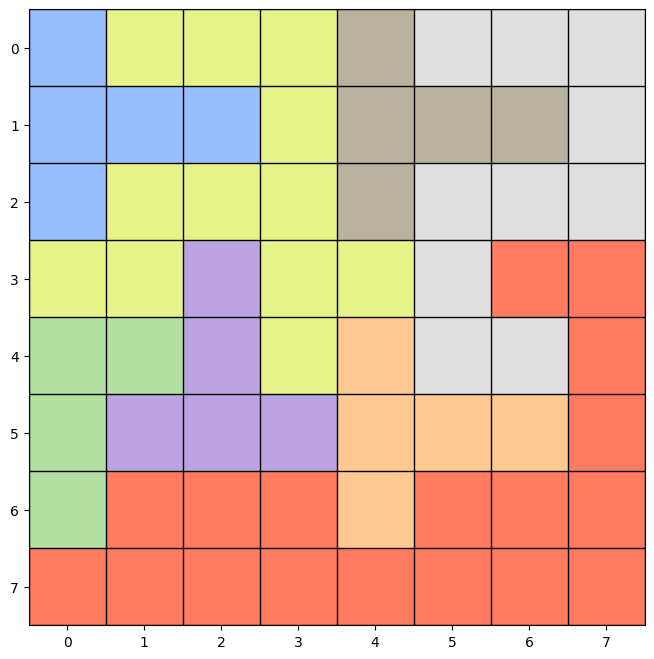

----------------------------------------
Processing /Users/HP/Desktop/Python/queen_solver/324.png...
grid_size = (9, 9)
62 62
563 562
Original image:


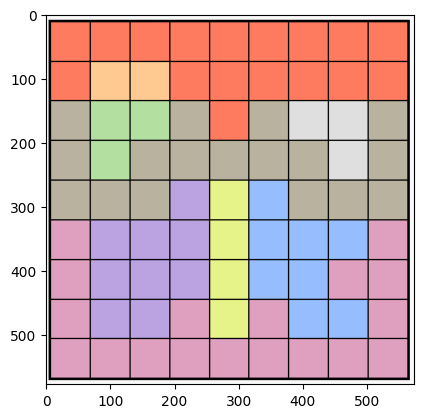

Color matrix:


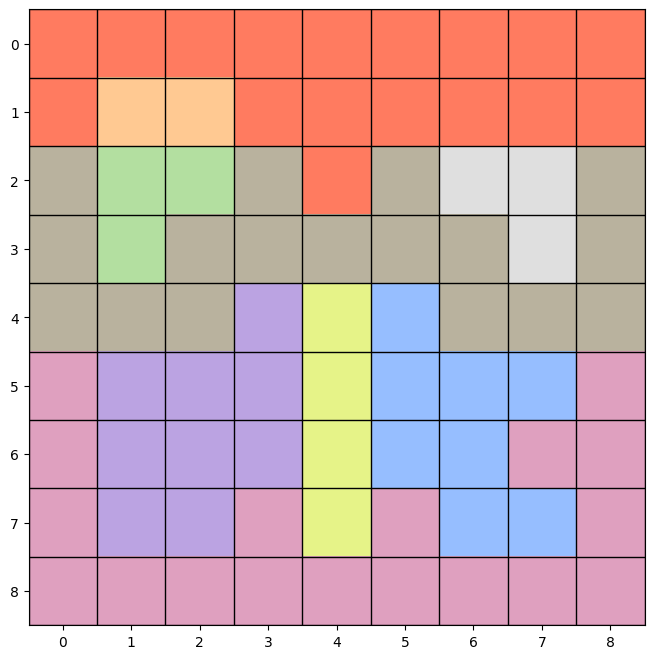

----------------------------------------
Processing /Users/HP/Desktop/Python/queen_solver/326.png...
grid_size = (9, 9)
62 62
563 562
Original image:


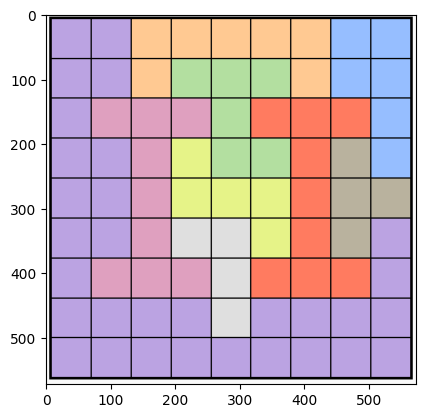

Color matrix:


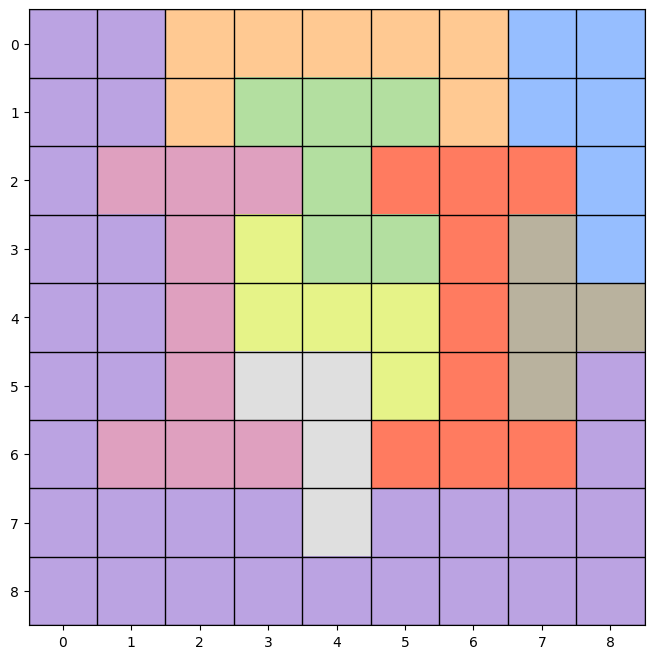

----------------------------------------
Processing /Users/HP/Desktop/Python/queen_solver/77.png...
grid_size = (8, 8)
62 62
500 500
Original image:


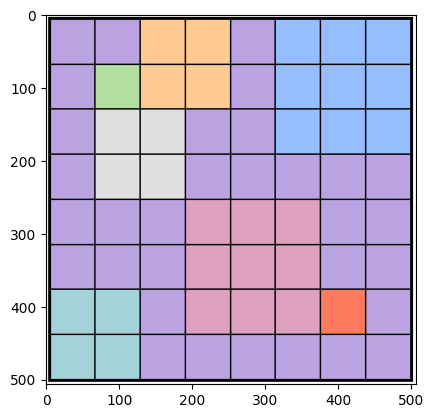

Color matrix:


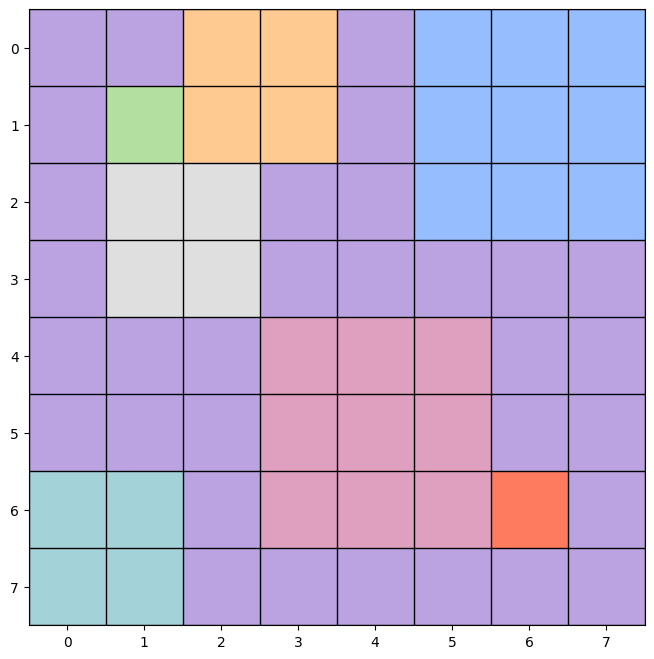

----------------------------------------
Processing /Users/HP/Desktop/Python/queen_solver/Screenshot 2025-03-10 180226.png...
grid_size = (9, 9)
62 62
563 562
Original image:


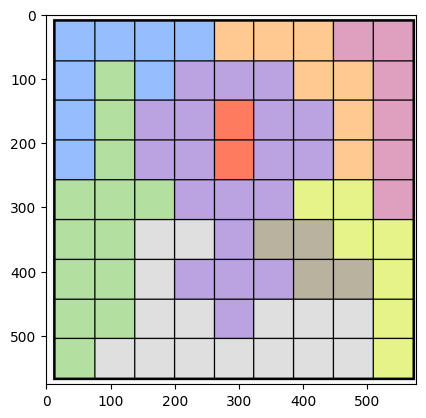

Color matrix:


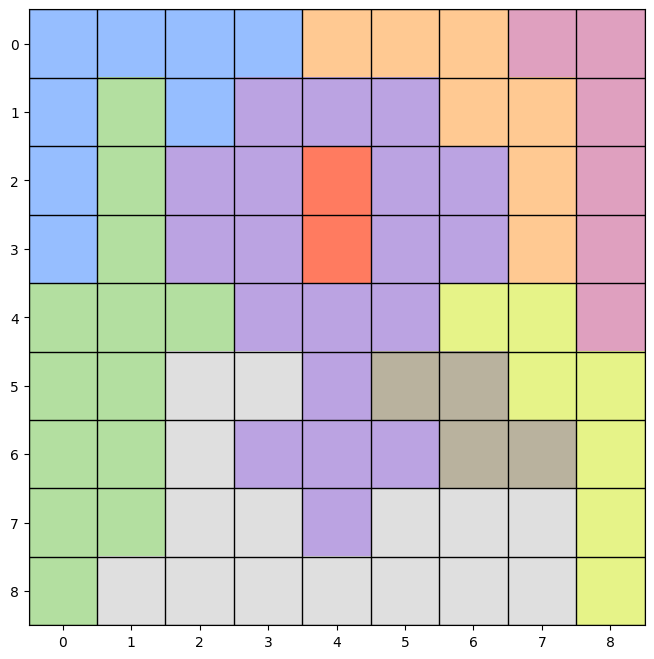

----------------------------------------


In [19]:
# Esegui il codice
directory = "/Users/HP/Desktop/Python/queen_solver/"
test(directory)

62 62
500 500


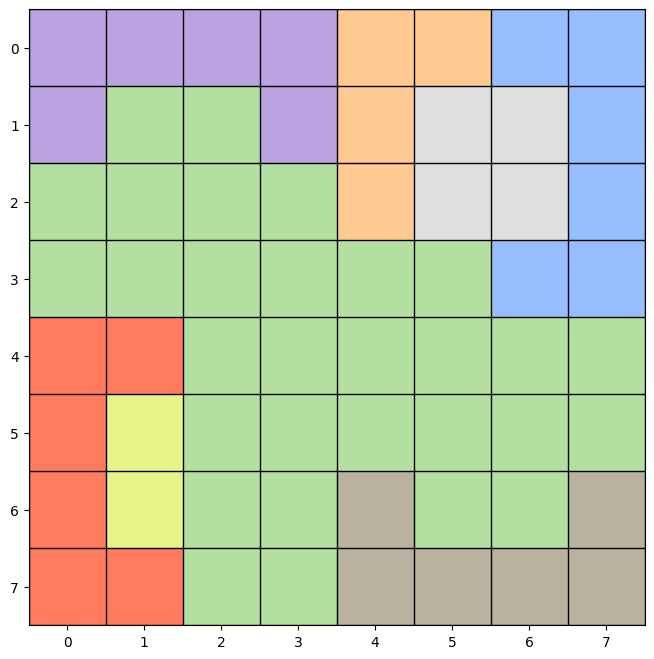

[[3 3 3 3 7 7 0 0]
 [3 1 1 3 7 4 4 0]
 [1 1 1 1 7 4 4 0]
 [1 1 1 1 1 1 0 0]
 [6 6 1 1 1 1 1 1]
 [6 5 1 1 1 1 1 1]
 [6 5 1 1 2 1 1 2]
 [6 6 1 1 2 2 2 2]]
{0: (150, 190, 255), 1: (179, 223, 160), 2: (185, 178, 158), 3: (187, 163, 226), 4: (223, 223, 223), 5: (230, 243, 136), 6: (255, 123, 96), 7: (255, 201, 146)}


In [23]:

# Esegui il codice
image_path = "/Users/HP/Desktop/Python/queen_solver/151.png"
color_matrix = main(image_path)


import numpy as np
import matplotlib.pyplot as plt

def plot_color_matrix(color_matrix):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks(np.arange(color_matrix.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(color_matrix.shape[0] + 1) - 0.5, minor=True)
    
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.tick_params(which="minor", size=0)
    
    ax.imshow(color_matrix.astype(np.uint8))
    plt.show()


def convert_color_matrix(color_matrix):
    unique_colors, indexed_matrix = np.unique(color_matrix.reshape(-1, 3), axis=0, return_inverse=True)
    indexed_matrix = indexed_matrix.reshape(color_matrix.shape[:2])
    #indexed_matrix = np.array([[[idx, 0] for idx in row] for row in indexed_matrix])
    color_dict = {i: tuple(color) for i, color in enumerate(unique_colors)}
    return indexed_matrix, color_dict



# Plot della matrice
plot_color_matrix(color_matrix)

indexed_matrix, color_dict = convert_color_matrix(color_matrix)
print(indexed_matrix)
print(color_dict)


In [20]:
color_matrix

array([[[187, 163, 226],
        [187, 163, 226],
        [187, 163, 226],
        [187, 163, 226],
        [255, 201, 146],
        [255, 201, 146],
        [150, 190, 255],
        [150, 190, 255]],

       [[187, 163, 226],
        [179, 223, 160],
        [179, 223, 160],
        [187, 163, 226],
        [255, 201, 146],
        [223, 223, 223],
        [223, 223, 223],
        [150, 190, 255]],

       [[179, 223, 160],
        [179, 223, 160],
        [179, 223, 160],
        [179, 223, 160],
        [255, 201, 146],
        [223, 223, 223],
        [223, 223, 223],
        [150, 190, 255]],

       [[179, 223, 160],
        [179, 223, 160],
        [179, 223, 160],
        [179, 223, 160],
        [179, 223, 160],
        [179, 223, 160],
        [150, 190, 255],
        [150, 190, 255]],

       [[255, 123,  96],
        [255, 123,  96],
        [179, 223, 160],
        [179, 223, 160],
        [179, 223, 160],
        [179, 223, 160],
        [179, 223, 160],
        [179, 223

In [90]:
%matplotlib qt
def load_and_preprocess_image(image_path):
    # Carica l'immagine
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Converti in scala di grigi
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Binarizzazione per identificare i bordi
    ret, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    print(ret)
    return image, thresh, gray

def detect_grid(thresh):
    # Trova i contorni
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Trova il rettangolo di bounding
    x, y, w, h = cv2.boundingRect(contours[0])
    
    return x, y, w, h

image, thresh, gray = load_and_preprocess_image(image_path)
x, y, w, h = detect_grid(thresh)


plt.imshow(image[y:y+h, x:x+w], cmap="gray")
plt.axvline(x,y-1,y+h+1, color='r', linewidth=2, zorder=1000)
plt.plot([3.5,3.5], [-1, h+1], 'r', linewidth=1)
plt.plot([w-4.5,w-4.5], [-1, h+1], 'r', linewidth=1)
plt.plot(100,200,'ro',markersize=10)
#plt.grid()
plt.show()

240.0


L'altezza e la larghezza non sono uguali, il codice funziona ma potrebbero nascere bugs a causa di questa cosa. Devo porvare con più immagini diverse!

In [38]:
print(gray[10,75])

0
